# Exercise 5.14: Gravitational pull of a uniform sheet

A uniform square sheet of metal is floating motionless in space.

The sheet is 10 m on a side of negligible thickness, and it has a mass of 10 metric tonnes.

a) Consider the gratiational force due to the plate felt by a point mass of 1 kg a distance $z$ from the center of the square, in the direction perpendicular to the sheet. Show that the component of the force along the $z$-axis is 

$$F_z = G\sigma z \int\int_{-L/2}^{L/2} \frac{\text{d}x\text{d}y}{(x^2+y^2+z^2)^{3/2}}$$

where $ G=6.674\times10^{-11}\text{m}^3\text{kg}^{-1}\text{s}^{-2}$ is Netwon's gravitaional constant and $\sigma$ is the mass per unit area of the sheet.

Let's start with the general formula for gravitational forces

$$ F_g = G\frac{m_1m_2}{r^2} $$

let $m_1$ be the mass of the point mass with a mass of $m_1=1\text{kg}$ so this drops out of our formula. Next let $m_2$ be the mass of our plate. Given that the mass of the plate is uniformly distributed we know that each point will have the same density. So we can express $m_2$ as

$$ m_2 = \int\int^{L/2}_{L/2} \sigma \text{d}x\text{d}y $$

We now need a way to expres the distance between the masses $r$

$$ r = \sqrt{x^2+y^2+z^2} $$

combining all equations we get

$$ F_g = G\sigma\int\int^{L/2}_{-L/2}\frac{\text{d}x\text{d}y}{x^2+y^2+z^2} $$

and to get the z-component we need to multiply with $cos\phi = \frac{z}{x^2+y^2+z^2}$

$$ F_g = G\sigma z\int\int^{L/2}_{-L/2}\frac{\text{d}x\text{d}y}{(x^2+y^2+z^2)^{3/2}} $$

which is our desired answer.

b) Write a program to calculate and plot the force as a function of $z$ from $z=0$ to $z=10$m. For the double integral use (double) Gaussian quadrature, as in Eq. (5.82), with 100 sample points along each axis.

Eq. 5.82

$$ I \simeq \sum^N_{i=1}\sum^N_{j=1} w_i w_j f(x_i,y_i).$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gaussxw import gaussxwab

In [5]:
def f(x, y, z):
    return G*sigma*z/(x**2+y**2+z**2)**(3/2)

In [6]:
def double_gaussian_quad(f, start, stop, N, z):
    
    x_vals, weights = gaussxwab(N, start, stop)
    
    I = 0
    
    for i in range(N):
        for j in range(N):
            I += weights[i]*weights[j]*f(x_vals[i],x_vals[j], z)
            
    return I

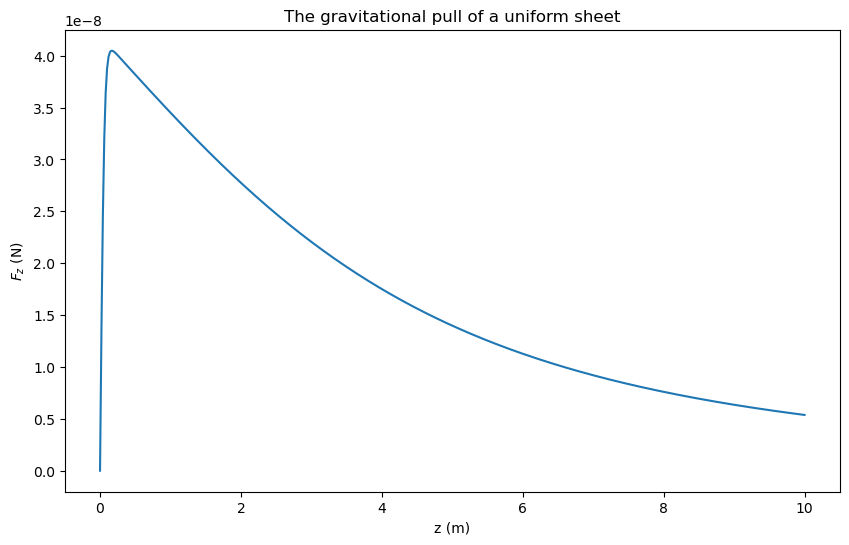

In [8]:
G = 6.674e-11 # m^3 kg^-1 Newton's graviational constant
N = 100
L = 10 # m - length of the sheet
start = -L/2
end = L/2
m = 10000
sigma = m/L**2 # weight per area


z_range = np.linspace(0, 10, 500)


Fz = double_gaussian_quad(f, start, end, N, z_range)


plt.figure(figsize=(10,6))
plt.title("The gravitational pull of a uniform sheet")
plt.xlabel("z (m)")
plt.ylabel("$F_z$ (N)")
plt.plot(z_range, Fz)
plt.show()

c) You should see a smooth curve, except at very small values of $z$, where the force should drop off suddenly to zero. This drop is not a real effect, but an artifact of the way we have done the calculation Explain briefly where this artifact comes from and suggest a strategy to remove it, or at least to decrease its size.

This has to do with how we approximate the distance between the point mass and every area of the sheet $dM$